In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [8]:
data = np.load('./fruits_300.npy')/255.0

In [9]:
data.shape

(300, 100, 100)

0


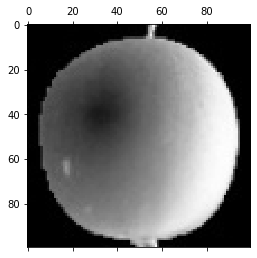

1


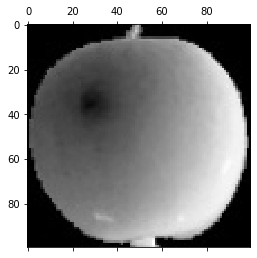

2


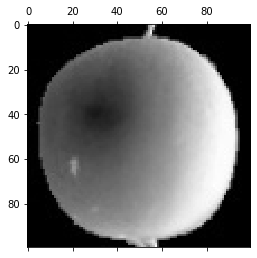

3


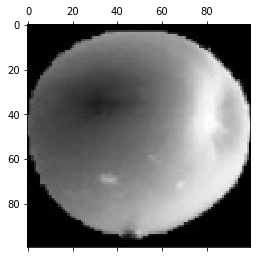

4


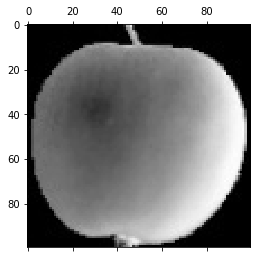

5


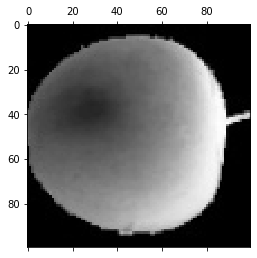

6


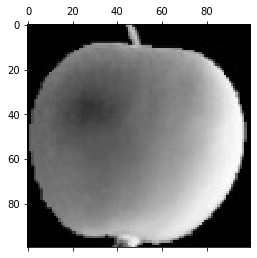

7


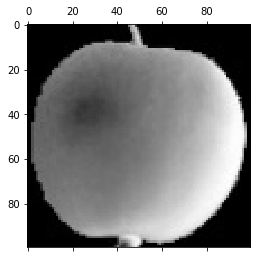

8


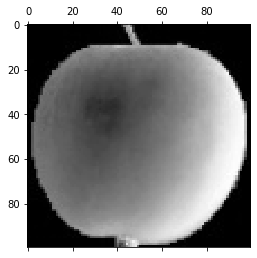

9


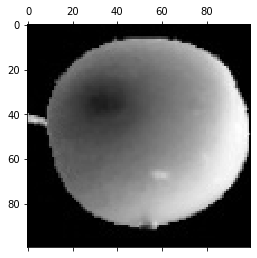

10


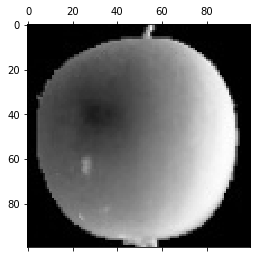

11


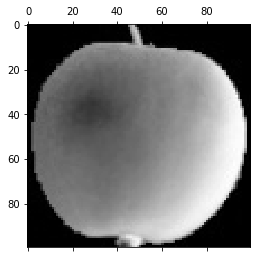

12


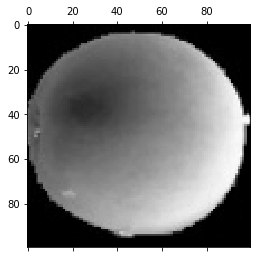

13


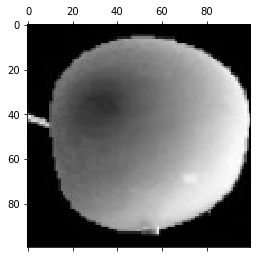

14


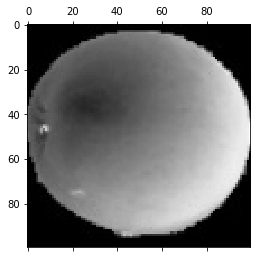

15


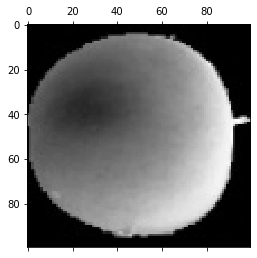

16


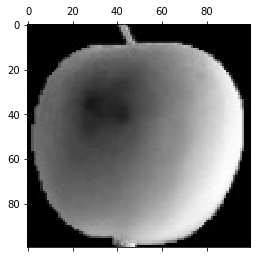

17


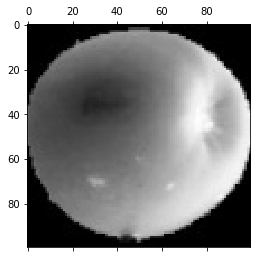

18


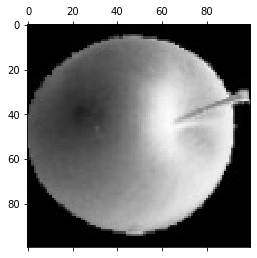

19


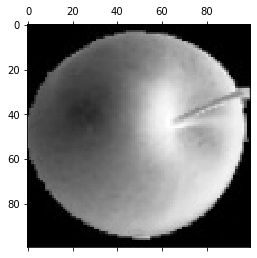

20


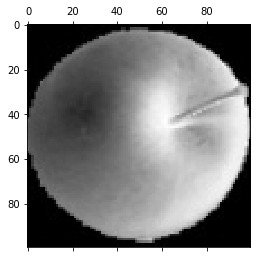

21


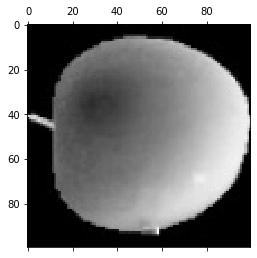

22


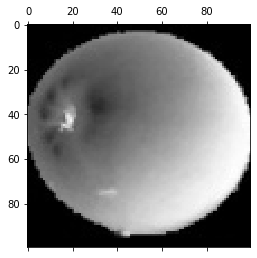

23


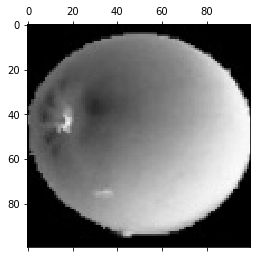

24


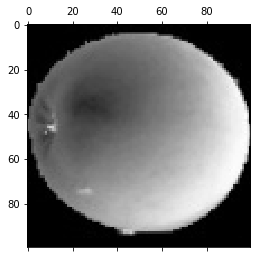

25


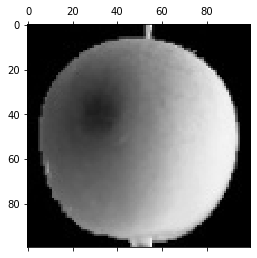

26


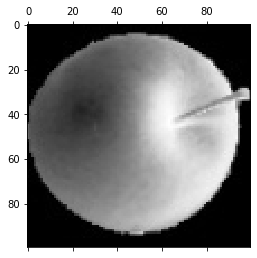

27


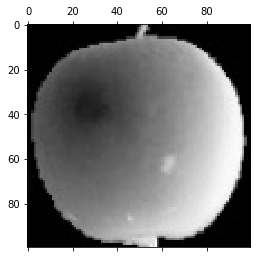

28


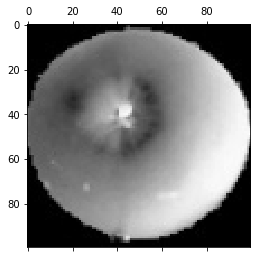

29


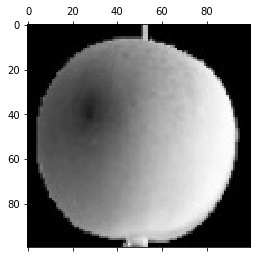

30


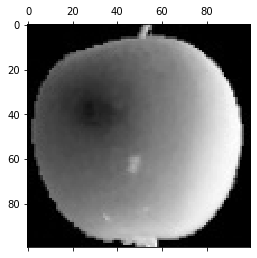

31


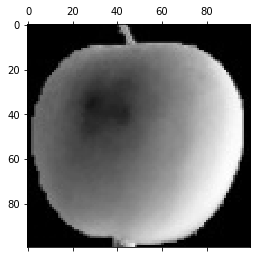

32


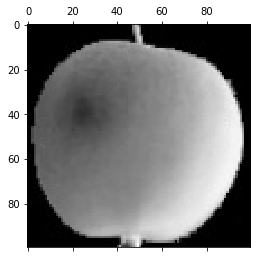

33


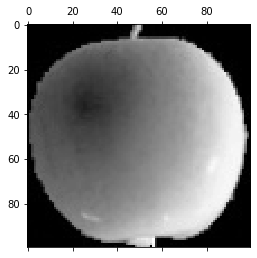

34


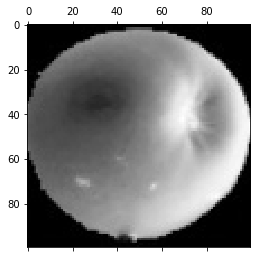

35


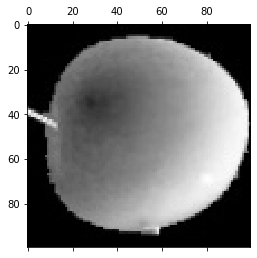

36


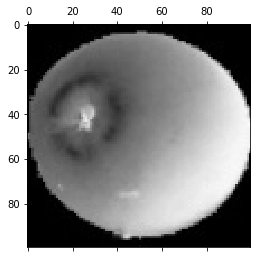

37


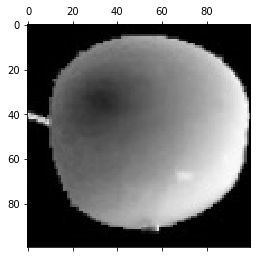

38


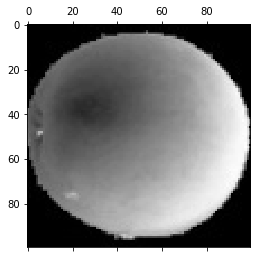

39


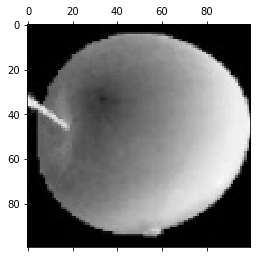

40


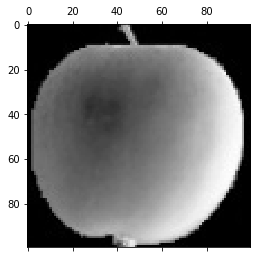

41


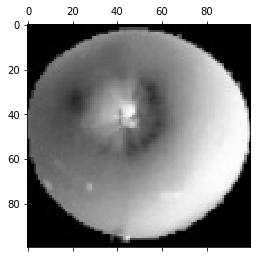

42


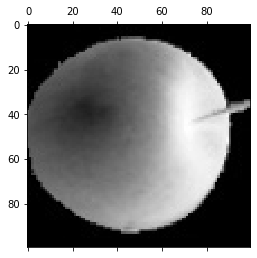

43


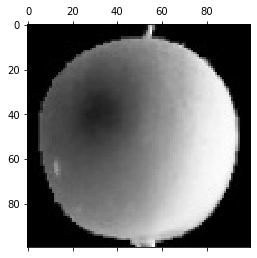

44


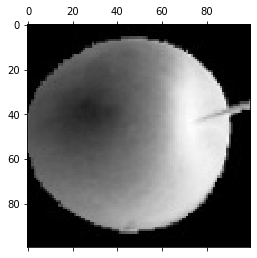

45


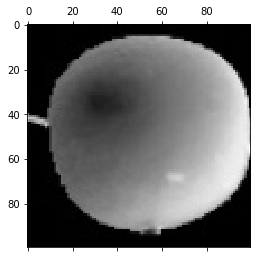

46


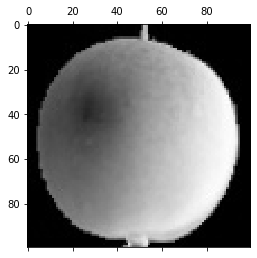

47


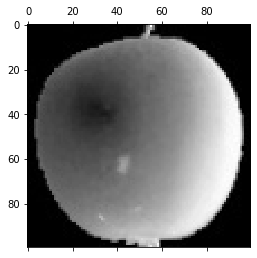

48


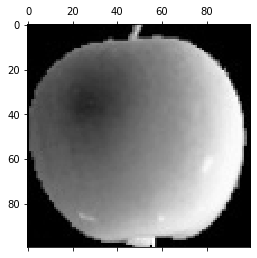

49


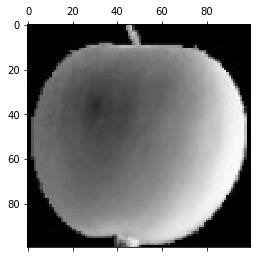

50


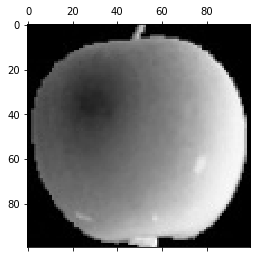

51


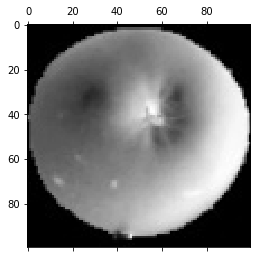

52


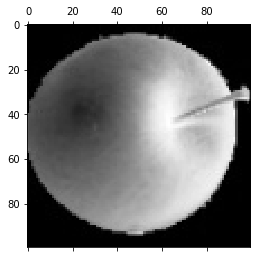

53


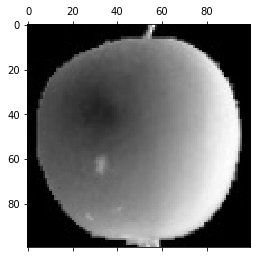

54


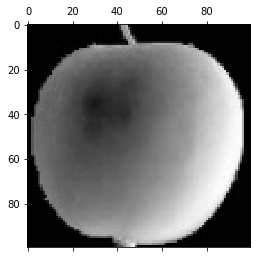

55


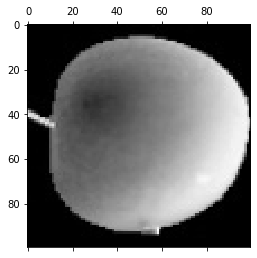

56


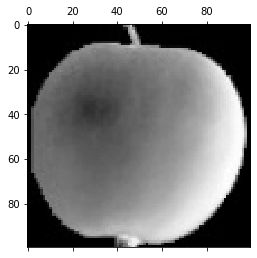

57


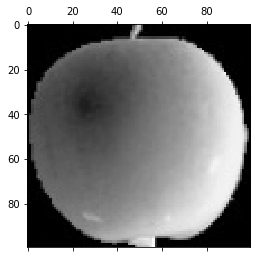

58


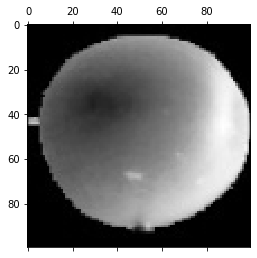

59


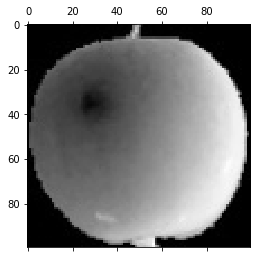

60


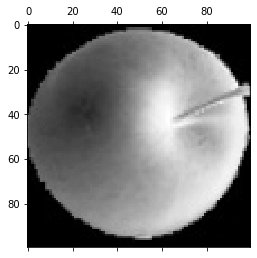

61


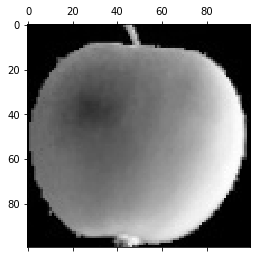

62


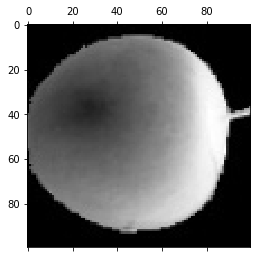

63


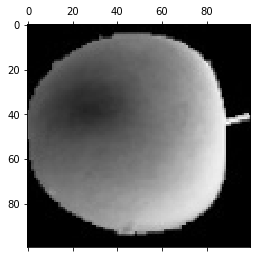

64


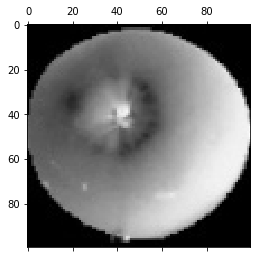

65


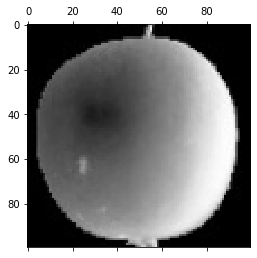

66


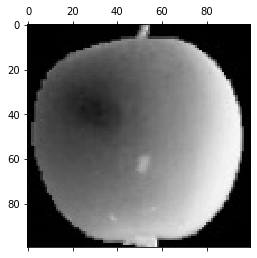

67


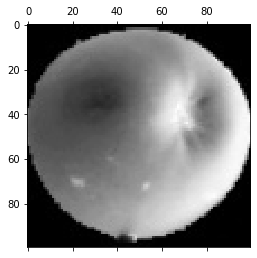

68


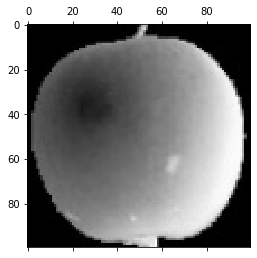

69


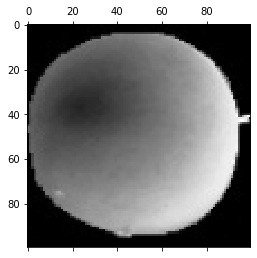

70


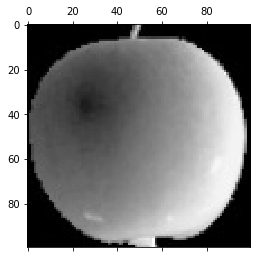

71


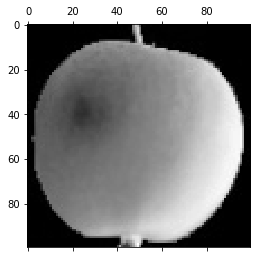

72


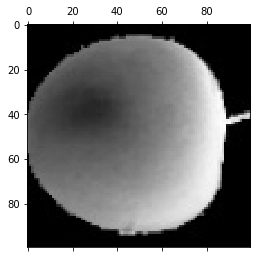

73


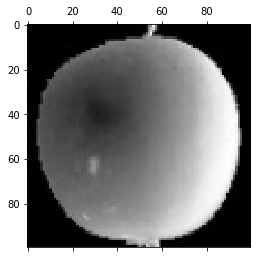

74


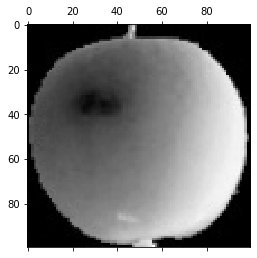

75


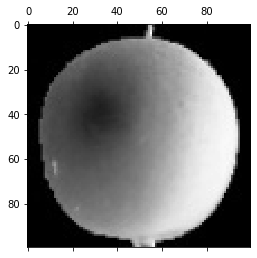

76


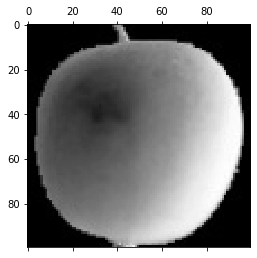

77


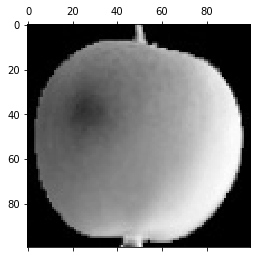

78


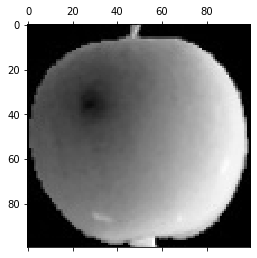

79


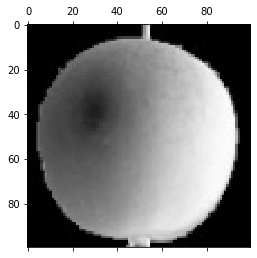

80


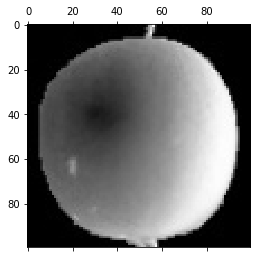

81


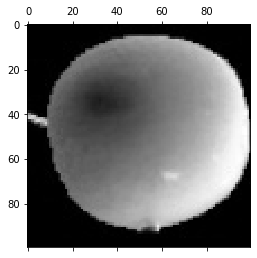

82


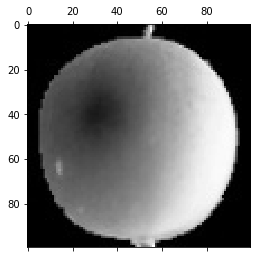

83


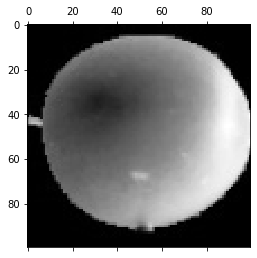

84


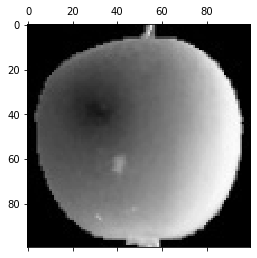

85


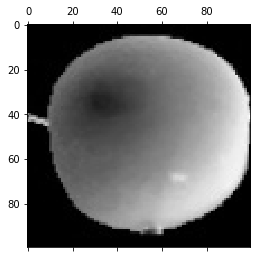

86


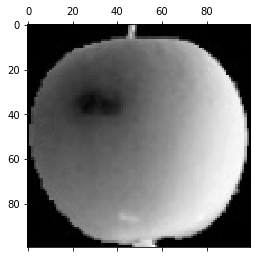

87


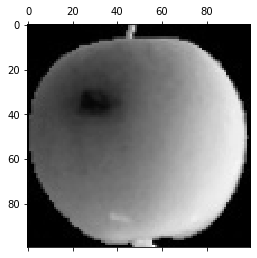

88


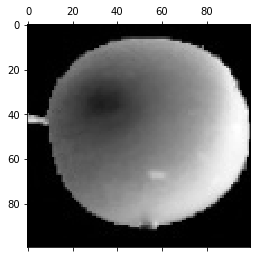

89


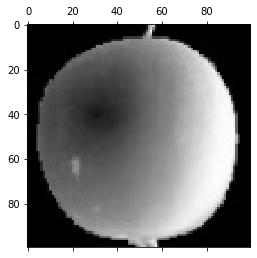

90


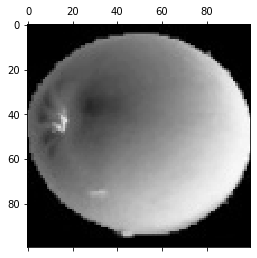

91


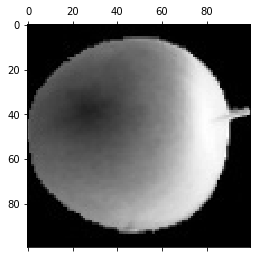

92


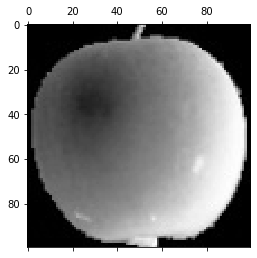

93


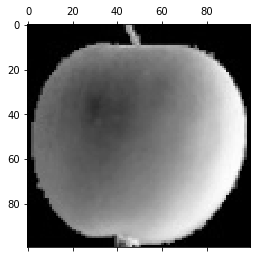

94


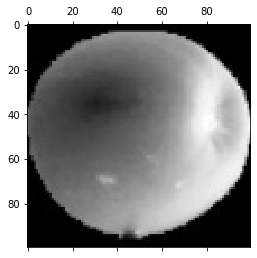

95


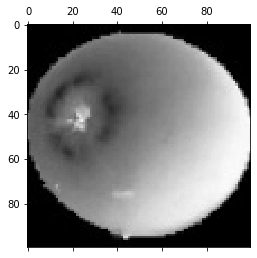

96


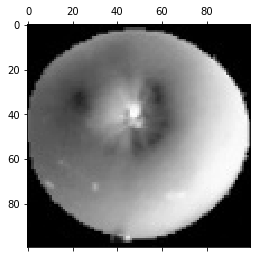

97


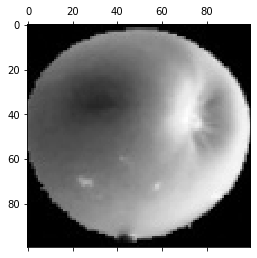

98


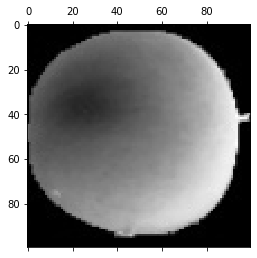

99


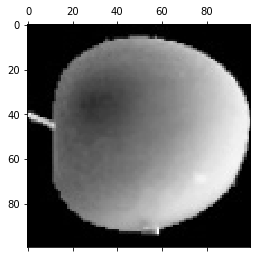

100


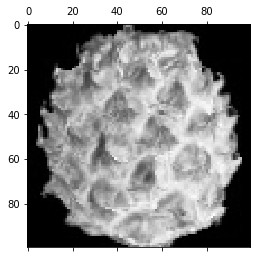

101


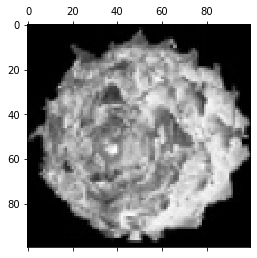

102


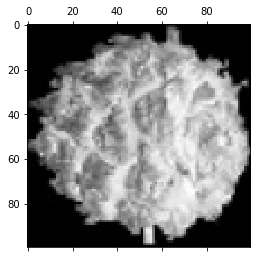

103


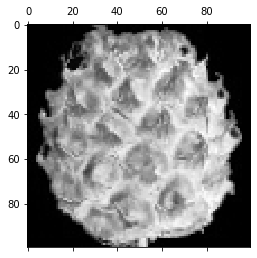

104


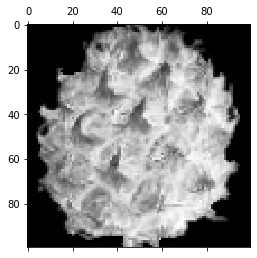

105


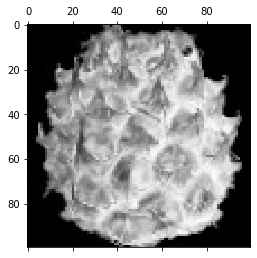

106


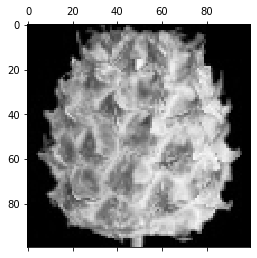

107


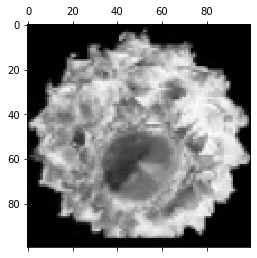

108


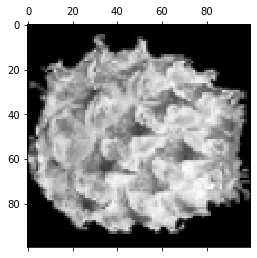

109


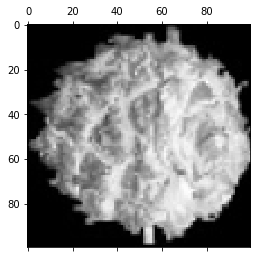

110


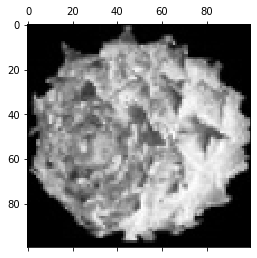

111


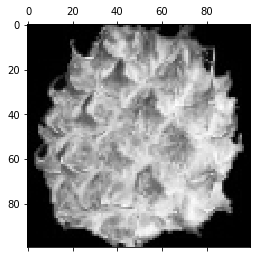

112


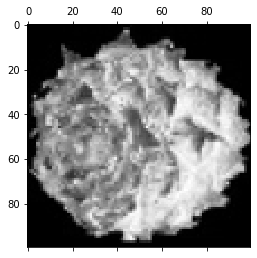

113


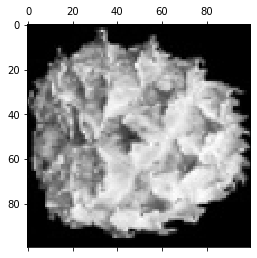

114


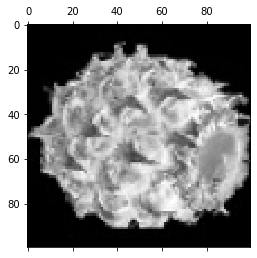

115


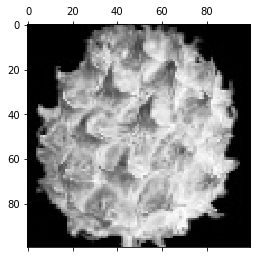

116


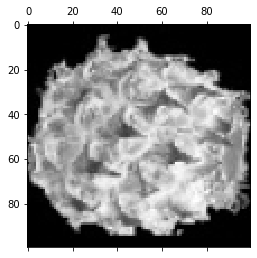

117


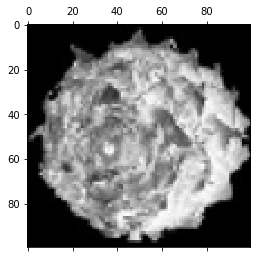

118


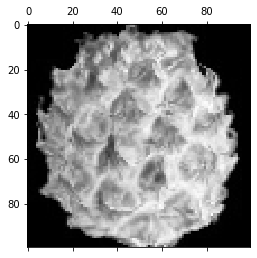

119


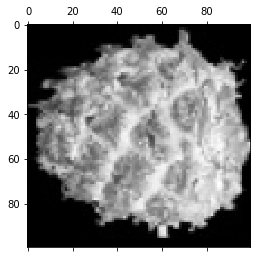

120


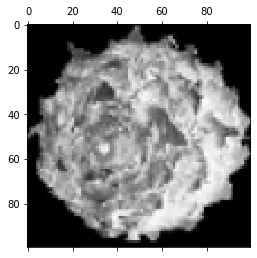

121


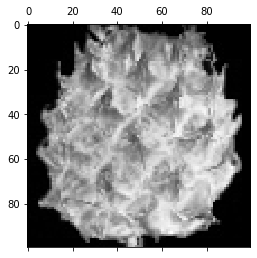

122


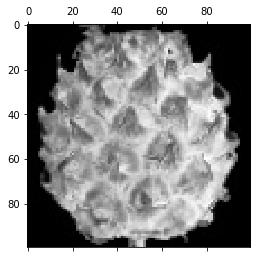

123


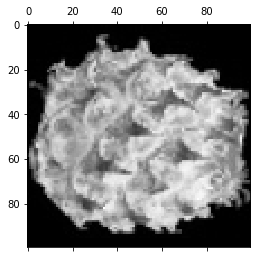

124


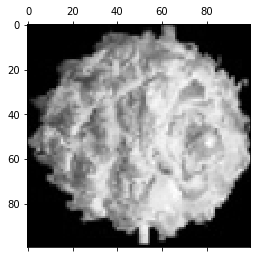

125


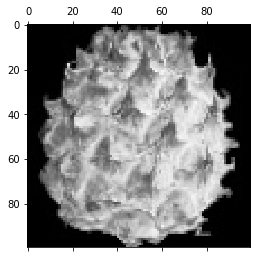

126


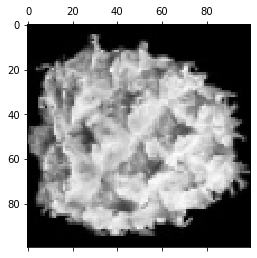

127


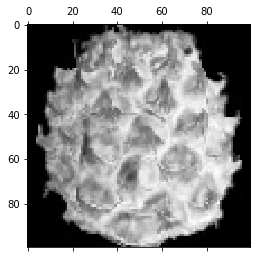

128


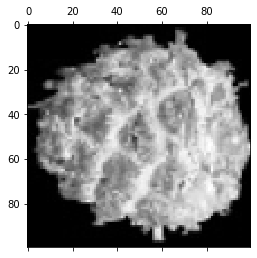

129


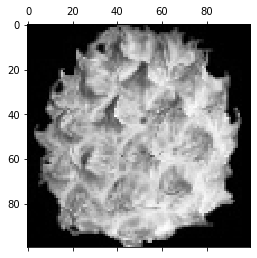

130


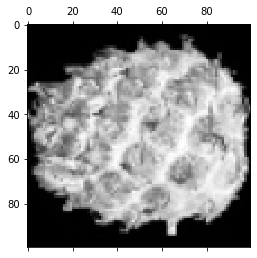

131


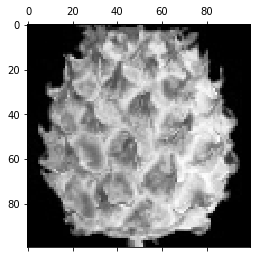

132


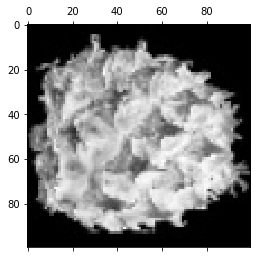

133


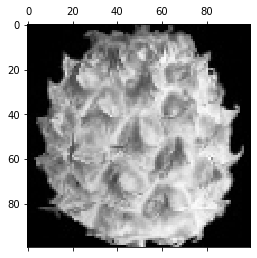

134


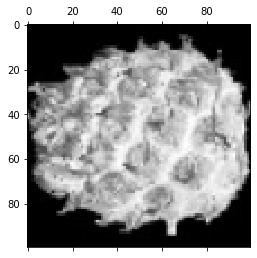

135


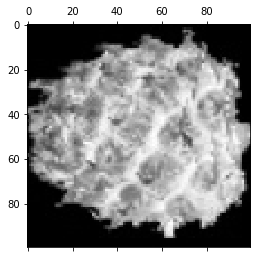

136


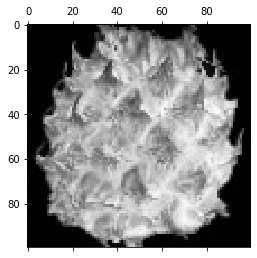

137


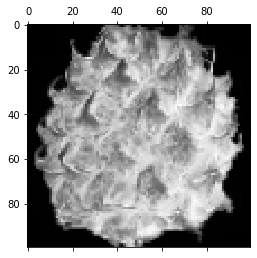

138


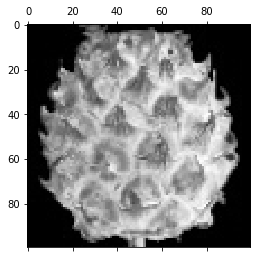

139


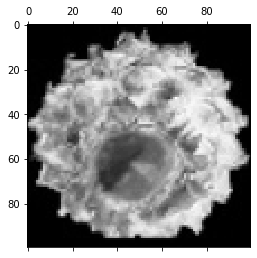

140


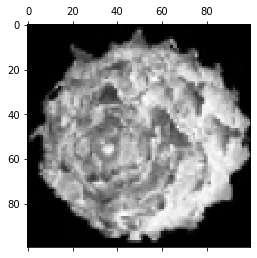

141


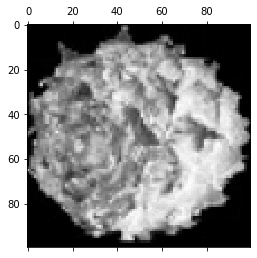

142


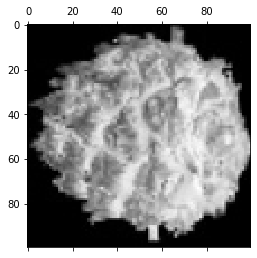

143


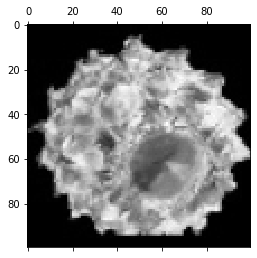

144


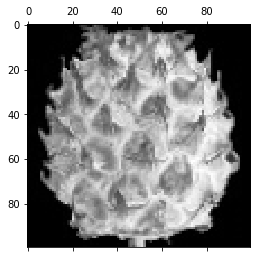

145


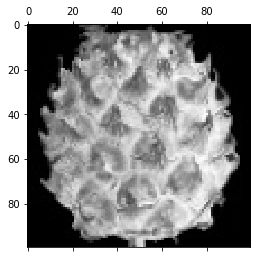

146


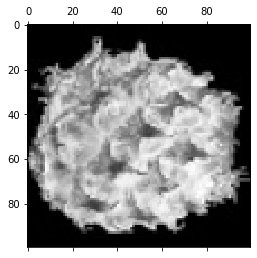

147


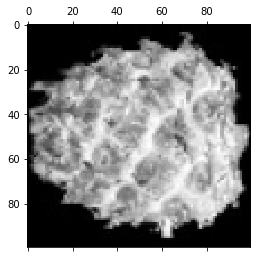

148


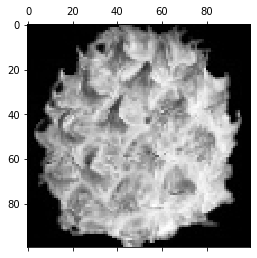

149


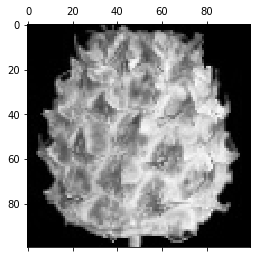

In [33]:
for i in range(150):
    print(i)
    plt.matshow(data[i], cmap = 'gray')
    plt.show()

In [12]:
pca = PCA(0.9)
pca_data = data.reshape(-1, 100**2)
pca_data = pca.fit_transform(pca_data)

In [13]:
pca.n_components_

39

In [15]:
pca_data.shape

(300, 39)

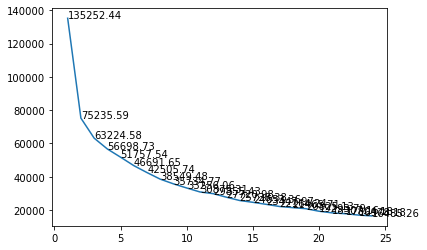

In [17]:
inertias = []
for i in range(1,25):
    km = KMeans(n_clusters = i,random_state=493)
    km.fit(pca_data)
    inertias.append(km.inertia_)
    
plt.plot(range(1,25), inertias)
for i in range(1,25):
    plt.text(i,inertias[i-1],round(inertias[i-1], 2))
    
plt.show()

In [34]:
km = KMeans(n_clusters = 3,random_state=493)
km.fit(pca_data)
clusters = km.labels_
np.unique(km.labels_, return_counts=True)

(array([0, 1, 2]), array([ 98,  91, 111], dtype=int64))

In [35]:
n_clusters = km.n_clusters

In [36]:
train_x,test_x, train_y, test_y = train_test_split(data, clusters,
                                                  random_state=493,
                                                  stratify= clusters)

train_x = train_x.reshape(-1, 100,100,1)
test_x = test_x.reshape(-1, 100,100,1)

In [49]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(225, 100, 100, 1) (225,)
(75, 100, 100, 1) (75,)


In [50]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Conv2D ,MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import set_random_seed

model = Sequential()
model.add(Conv2D(
    16,
    3,
    activation= 'relu',
    input_shape = (100,100,1)                 
))
model.add(MaxPooling2D())
model.add(Conv2D(
    32,
    3,
    activation = 'relu'
))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(
    n_clusters,
    activation = 'softmax'
))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 16928)             0         
                                                                 
 dense_1 (Dense)             (None, 3)                

In [51]:
model.compile(
    optimizer='adam',
    loss = 'SparseCategoricalCrossentropy',
    matrics = 'accuracy'
)

In [52]:
model.fit(train_x, train_y,
         epochs = 20,
         validation_split=0.2)

Epoch 1/20
6/6 [==============================] - 3s 396ms/step - loss: 0.9103 - val_loss: 0.7092
Epoch 2/20
6/6 [==============================] - 2s 321ms/step - loss: 0.4862 - val_loss: 0.4181
Epoch 3/20
6/6 [==============================] - 2s 315ms/step - loss: 0.2197 - val_loss: 0.2153
Epoch 4/20
6/6 [==============================] - 2s 355ms/step - loss: 0.0993 - val_loss: 0.0727
Epoch 5/20
6/6 [==============================] - 2s 315ms/step - loss: 0.0397 - val_loss: 0.0549
Epoch 6/20
6/6 [==============================] - 2s 334ms/step - loss: 0.0287 - val_loss: 0.0189
Epoch 7/20
6/6 [==============================] - 2s 311ms/step - loss: 0.0229 - val_loss: 0.0315
Epoch 8/20
6/6 [==============================] - 2s 320ms/step - loss: 0.0264 - val_loss: 0.0358
Epoch 9/20
6/6 [==============================] - 2s 317ms/step - loss: 0.0267 - val_loss: 0.0483
Epoch 10/20
6/6 [==============================] - 2s 324ms/step - loss: 0.0121 - val_loss: 0.0448
Epoch 11/20
6/6 [==

In [53]:
model.evaluate(test_x, test_y)

3/3 [==============================] - 0s 81ms/step - loss: 0.0644


0.06441812217235565

In [55]:
np.round(model.predict(test_x[[0]]),2)

1/1 [==============================] - 0s 22ms/step


array([[0., 1., 0.]], dtype=float32)

In [56]:
test_y[0]

1